# HR-аналитика

ЦЕЛИ И ЗАДАЧИ:
1) Задача 1. -  построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

2) Задача 2. -  построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

ХОД РАБОТЫ ЗАДАЧА 1
- Шаг 1. Загрузка данных

- Шаг 2. Предобработка данных

- Шаг 3. Исследовательский анализ данных

- Корреляционный анализ

- Шаг 4. Подготовка данных

- Шаг 5. Обучение моделей

- Шаг 6. Оформление выводов



ОПИСАНИЕ ДАННЫХ ЗАДАЧА 1

Файлы с данными:

Тренировочная выборка:train_job_satisfaction_rate.csv

Входные признаки тестовой выборки: test_features.csv

Целевой признак тестовой выборки: test_target_job_satisfaction_rate.csv

Для этой задачи заказчик предоставил данные с признаками:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

ХОД РАБОТЫ ЗАДАЧА 2
- Шаг 1. Загрузка данных

- Шаг 2. Предобработка данных

- Шаг 3. Исследовательский анализ данных

- Шаг 4. Добавление нового входного признака

- Корреляционный анализ

- Шаг 5. Подготовка данных

- Шаг 6. Обучение модели

- Шаг 7. Выводы



ОПИСАНИЕ ДАННЫХ ЗАДАЧА 2

Файлы с данными:

Тренировочная выборка:train_quit.csv

Входные признаки тестовой выборки: test_features.csv

Целевой признак тестовой выборки: test_target_quit.csv

Для этой задачи заказчик предоставил данные с признаками:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Перед началом работы импортируем все необходимые пакеты

In [1]:
!pip install phik -q

In [2]:
!pip install shap -q

In [3]:
!pip install --upgrade scikit-learn==1.2 -q

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import phik

from phik import phik_matrix
from phik.report import plot_correlation_matrix
from plotly.subplots import make_subplots

from scipy import stats as st
from scipy.stats import binom, poisson
from scipy.stats import gaussian_kde
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.datasets import  make_classification
from sklearn.inspection import permutation_importance

RANDOM_STATE = 50
TEST_SIZE = 0.25

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

## Задача

### Шаг 1. Загрузка данных

In [5]:
train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

def check_data(name):
    print('общая информация ***************************************************************************************************')
    name.info()
    print('первые 5 строк *****************************************************************************************************')
    display(name.head())
    print('название столбцов **************************************************************************************************')
    display(name.columns)
    print('количество пропусков ***********************************************************************************************')
    print(name.isnull().sum())
    print('количество явных дубликатов ********************************************************************************************')
    print(name.duplicated().sum())
    display(name.describe().T)

In [6]:
check_data(train)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
первые 5 строк *************************************************************************

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


название столбцов **************************************************************************************************


Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

количество пропусков ***********************************************************************************************
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


In [7]:
check_data(X_test)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
первые 5 строк *****************************************************************************************************


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


название столбцов **************************************************************************************************


Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

количество пропусков ***********************************************************************************************
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0


In [8]:
check_data(y_test)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
первые 5 строк *****************************************************************************************************


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


название столбцов **************************************************************************************************


Index(['id', 'job_satisfaction_rate'], dtype='object')

количество пропусков ***********************************************************************************************
id                       0
job_satisfaction_rate    0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21350,253851.326129,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0


Вывод к шагу 1.1
- данные выгружены
- явных дубликатов нет
- есть пропуски
- все данные соответствуют форматам

Значит можно переходить к предобработке

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### Шаг 2. Предобработка данных

Так как с названиями столбцов все хорошо, а с пропусками мы разберемся в Pipeline, то остается только проверить данные на неявные дубликаты >>>

In [9]:
for column in train.drop(['id', 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'], axis=1).columns:
    print(f'Уникальные значения в признаке {column}: ', train[column].sort_values().unique())
    print(train[column].value_counts())

Уникальные значения в признаке dept:  ['hr' 'marketing' 'purchasing' 'sales' 'technology' nan]
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64
Уникальные значения в признаке level:  ['junior' 'middle' 'sinior' nan]
junior    1894
middle    1744
sinior     358
Name: level, dtype: int64
Уникальные значения в признаке workload:  ['high' 'low' 'medium']
medium    2066
low       1200
high       734
Name: workload, dtype: int64
Уникальные значения в признаке last_year_promo:  ['no' 'yes']
no     3880
yes     120
Name: last_year_promo, dtype: int64
Уникальные значения в признаке last_year_violations:  ['no' 'yes']
no     3441
yes     559
Name: last_year_violations, dtype: int64


В тренировочной выборке неявных дубликотов нет, есть пропуски

In [10]:
for column in X_test.drop(['id', 'employment_years', 'supervisor_evaluation', 'salary'], axis=1).columns:
    print(f'Уникальные значения в признаке {column}: ', X_test[column].sort_values().unique())
    print(X_test[column].value_counts())

Уникальные значения в признаке dept:  [' ' 'hr' 'marketing' 'purchasing' 'sales' 'technology' nan]
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64
Уникальные значения в признаке level:  ['junior' 'middle' 'sinior' nan]
junior    974
middle    854
sinior    171
Name: level, dtype: int64
Уникальные значения в признаке workload:  [' ' 'high' 'low' 'medium']
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64
Уникальные значения в признаке last_year_promo:  ['no' 'yes']
no     1937
yes      63
Name: last_year_promo, dtype: int64
Уникальные значения в признаке last_year_violations:  ['no' 'yes']
no     1738
yes     262
Name: last_year_violations, dtype: int64


Есть пропуски в виде пробелов, чтобы не было путаницы заменим их на np.nan, а позже в пайплайне займемся их обработкой 

In [11]:
# X_test.loc[X_test['dept'] == ' ', 'dept'] = np.nan
# X_test.loc[X_test['workload'] == ' ', 'workload'] = np.nan

Вывод к шагу 1.2
- неявные дубликаты не обнаружены
- пропуски в виде ' ' были заменены на np.nan и позже мы разберемся с ними в пайплайне

### Шаг 3. Исследовательский анализ данных

Проведем исседовательский анализ выборок, опишем распределения у количественных признаков, посмотрим на выбросы и аномалии с помощью boxplot. У категориальных и порядковых признаков выведем диаграммы в процентном соотношении и на их основе будем делать выводы о данных.

In [12]:
def stat(DATA):
    display(DATA.describe().T)
    DATA.drop('id', axis=1).hist(figsize=(10, 7))

In [13]:
def bxplt(DATA, name):
    sns.boxplot(data = DATA, y = name)
    plt.ylabel(name)
    plt.title('Ящик с усами')
    
def hst(DATA, name):
    DATA[name].hist(color='green', bins=60, edgecolor = 'black')
    plt.title('Распределение признака', fontsize=15)
    plt.xlabel(name, fontsize=12)
    plt.ylabel('Количеcтво',fontsize=12)
    print(DATA[name].describe())

In [14]:
def pie(DATA, name):
    palette_color = sns.color_palette('pastel') 
    DATA[name].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = f'Распределение признака {name}', colors = palette_color, figsize = (14, 6))
    plt.axis('off')
    plt.show()

,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


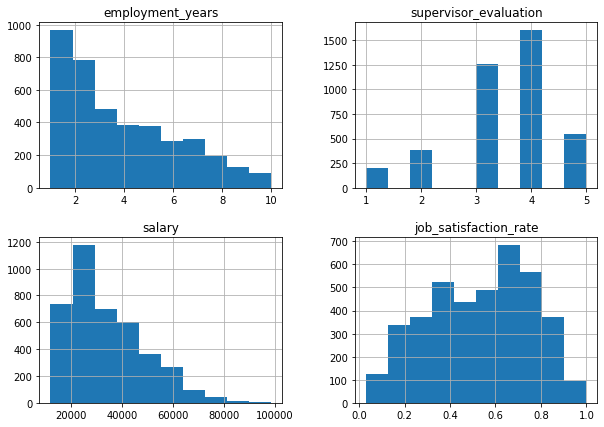

In [15]:
stat(train)

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0


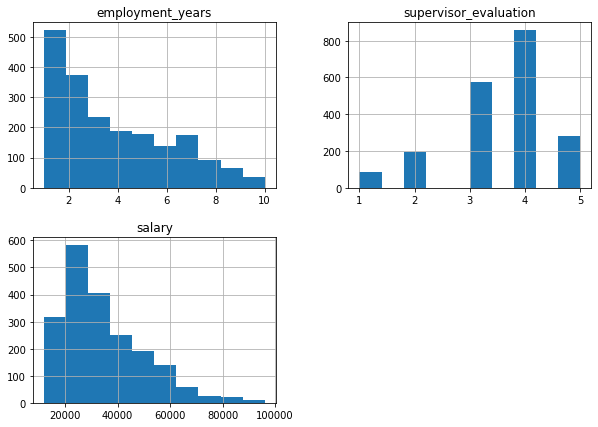

In [16]:
stat(X_test)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что сравниваешь выборки!</font>

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21350,253851.326129,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0


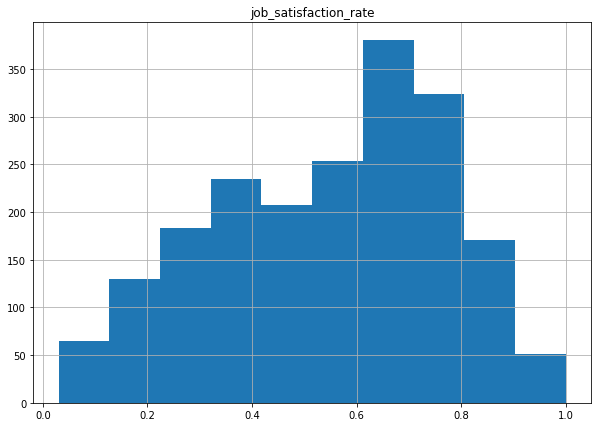

In [17]:
stat(y_test)

КОЛИЧЕСТВЕННЫЕ ПРИЗНАКИ ТРЕНИРОВОЧНОЙ ВЫБОРКИ

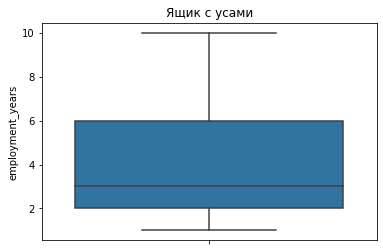

In [18]:
bxplt(train, 'employment_years')

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


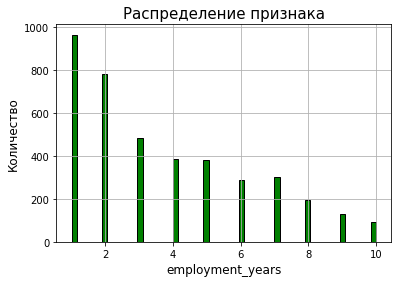

In [19]:
hst(train, 'employment_years')

Распределение имеет такой вид так как значения в выборке имеют дискретный спектр, то есть могут принимать определенные значения(1, 2, 3, 4, 5, 6, 7, 8, 9, 10). Стоит отметить большая часть сотрудников работают в компании всего 1-2 года.

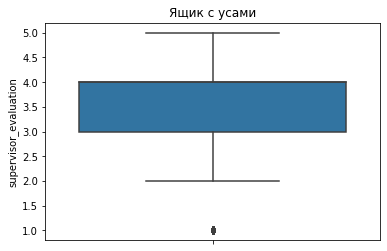

In [20]:
bxplt(train, 'supervisor_evaluation')

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


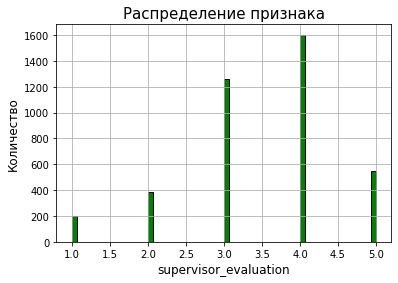

In [21]:
hst(train, 'supervisor_evaluation')

Тоже самое что и с 'employment_years', признак имеет не непрерывный спектр значений, а дискретный(1, 2, 3, 4, 5), поэтому распределение имеет такой вид. Стоит отметить что большинство своих сотрудников руководитель оценивает на 4 балла.

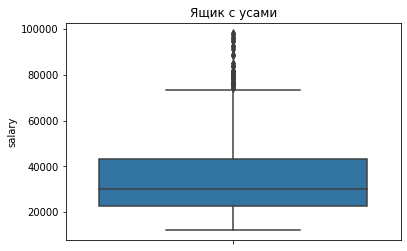

In [22]:
bxplt(train, 'salary')

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


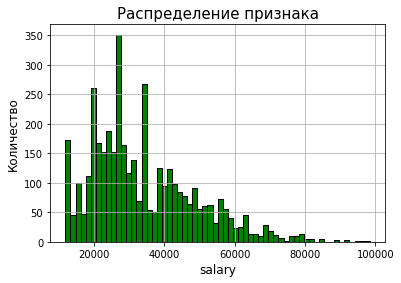

In [23]:
hst(train, 'salary')

Распределение имеет вид скорее Пуассона, нежели нормального распределения. Выбросы имеются, однако отрицательных и аномальных значений не обнаружено.

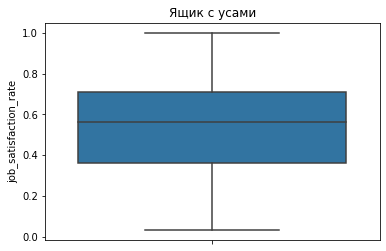

In [24]:
bxplt(train, 'job_satisfaction_rate')

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


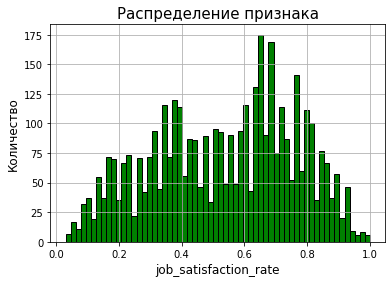

In [25]:
hst(train, 'job_satisfaction_rate')

На мой взгляд данный признак распределен неравномерно)

КОЛИЧЕСТВЕННЫЕ ПРИЗНАКИ ТЕСТОВОЙ ВЫБОРКИ (ВХОДНЫЕ)

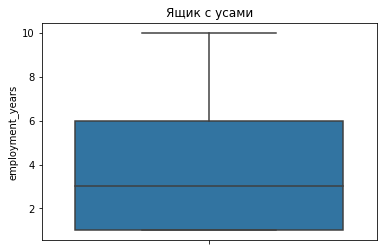

In [26]:
bxplt(X_test,  'employment_years')

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


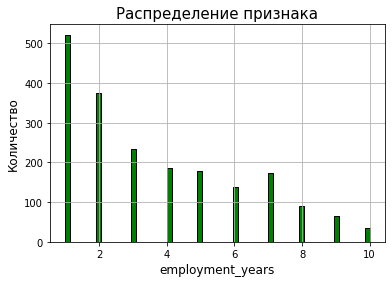

In [27]:
hst(X_test, 'employment_years')

Аналогично с тем же признаком из тренировочной выборки

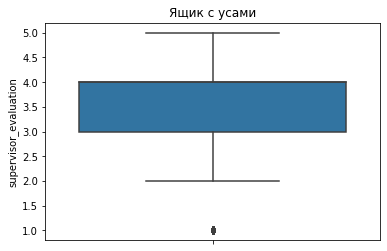

In [28]:
bxplt(X_test, 'supervisor_evaluation')

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


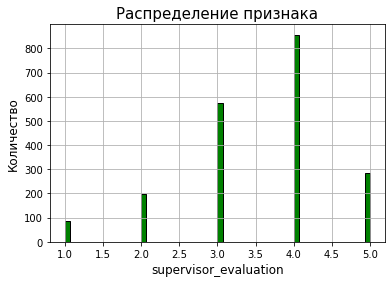

In [29]:
hst(X_test, 'supervisor_evaluation')

Аналогично с тем же признаком из тренировочной выборки

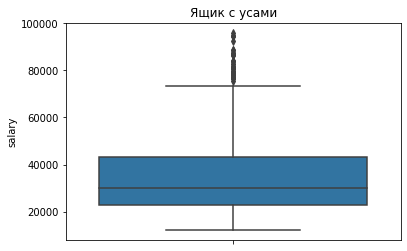

In [30]:
bxplt(X_test, 'salary')

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


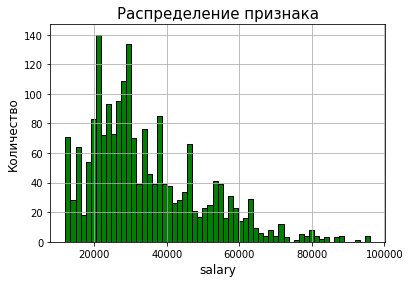

In [31]:
hst(X_test, 'salary')

Аналогично с тем же признаком из тренировочной выборки

КОЛИЧЕСТВЕННЫЙ ПРИЗНАК ТЕСТОВОЙ ВЫБОРКИ (ЦЕЛЕВОЙ)

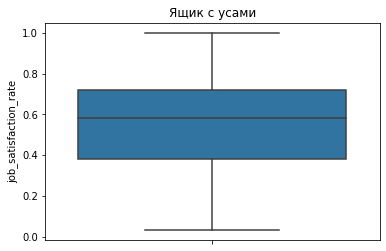

In [32]:
bxplt(y_test, 'job_satisfaction_rate')

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


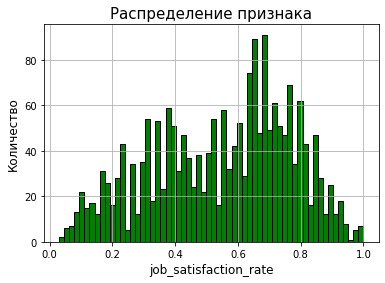

In [33]:
hst(y_test, 'job_satisfaction_rate')

Аналогично с тем же признаком из тренировочной выборки

КАТЕГОРИАЛЬНЫЕ И ПОРЯДКОВЫЕ ПРИЗНАКИ ТРЕНИРОВОЧНОЙ ВЫБОРКИ

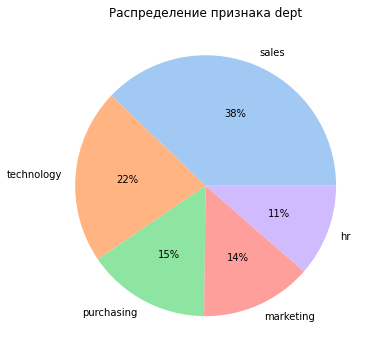

In [34]:
pie(train, 'dept')

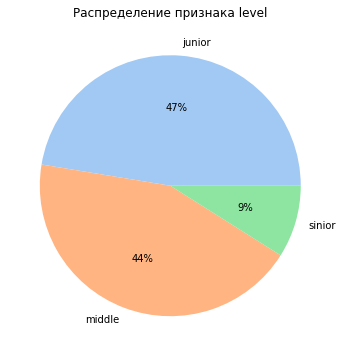

In [35]:
pie(train, 'level')

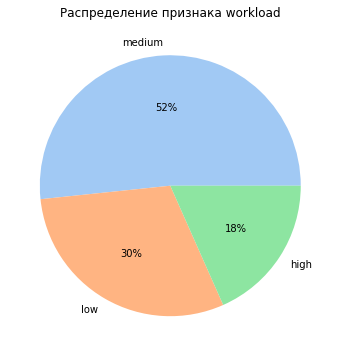

In [36]:
pie(train, 'workload')

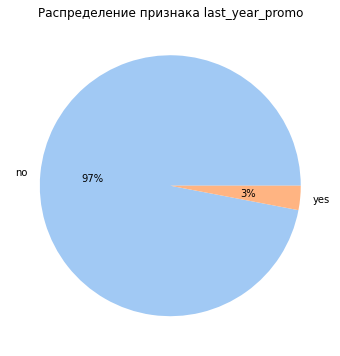

In [37]:
pie(train, 'last_year_promo')

КАТЕГОРИАЛЬНЫЕ  И ПОРЯДКОВЫЕ ПРИЗНАКИ ТЕСТОВОЙ ВЫБОРКИ

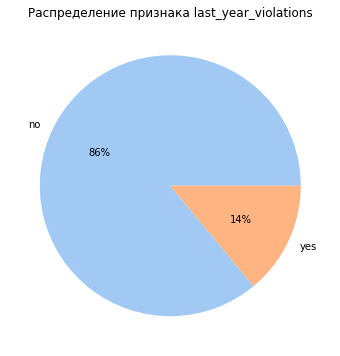

In [38]:
pie(train, 'last_year_violations')

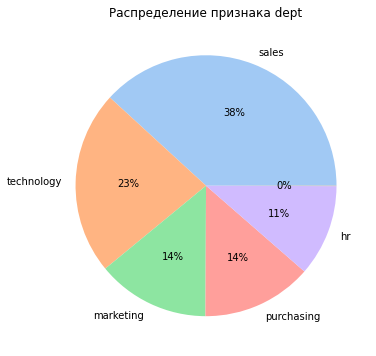

In [39]:
pie(X_test, 'dept')

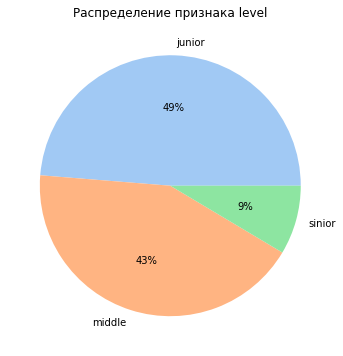

In [40]:
pie(X_test, 'level')

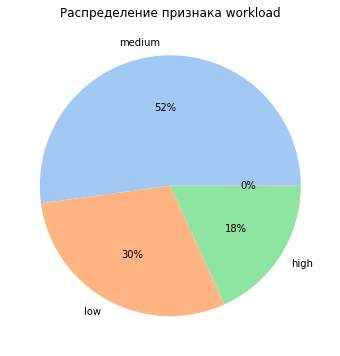

In [41]:
pie(X_test, 'workload')

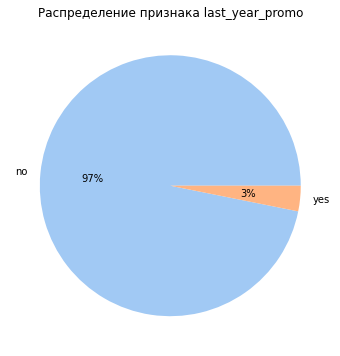

In [42]:
pie(X_test, 'last_year_promo')

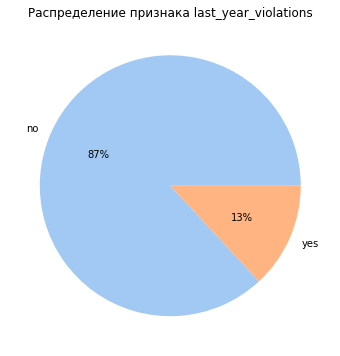

In [43]:
pie(X_test, 'last_year_violations')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

</span><br><span style="color: purple; font-weight: bold">Спасибо)</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ(ТРЕНИРОВОЧНАЯ)

In [44]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['salary', 'job_satisfaction_rate']

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(train.set_index('id'),interval_cols=interval_cols)
print(phik_overview.shape) 

(9, 9)


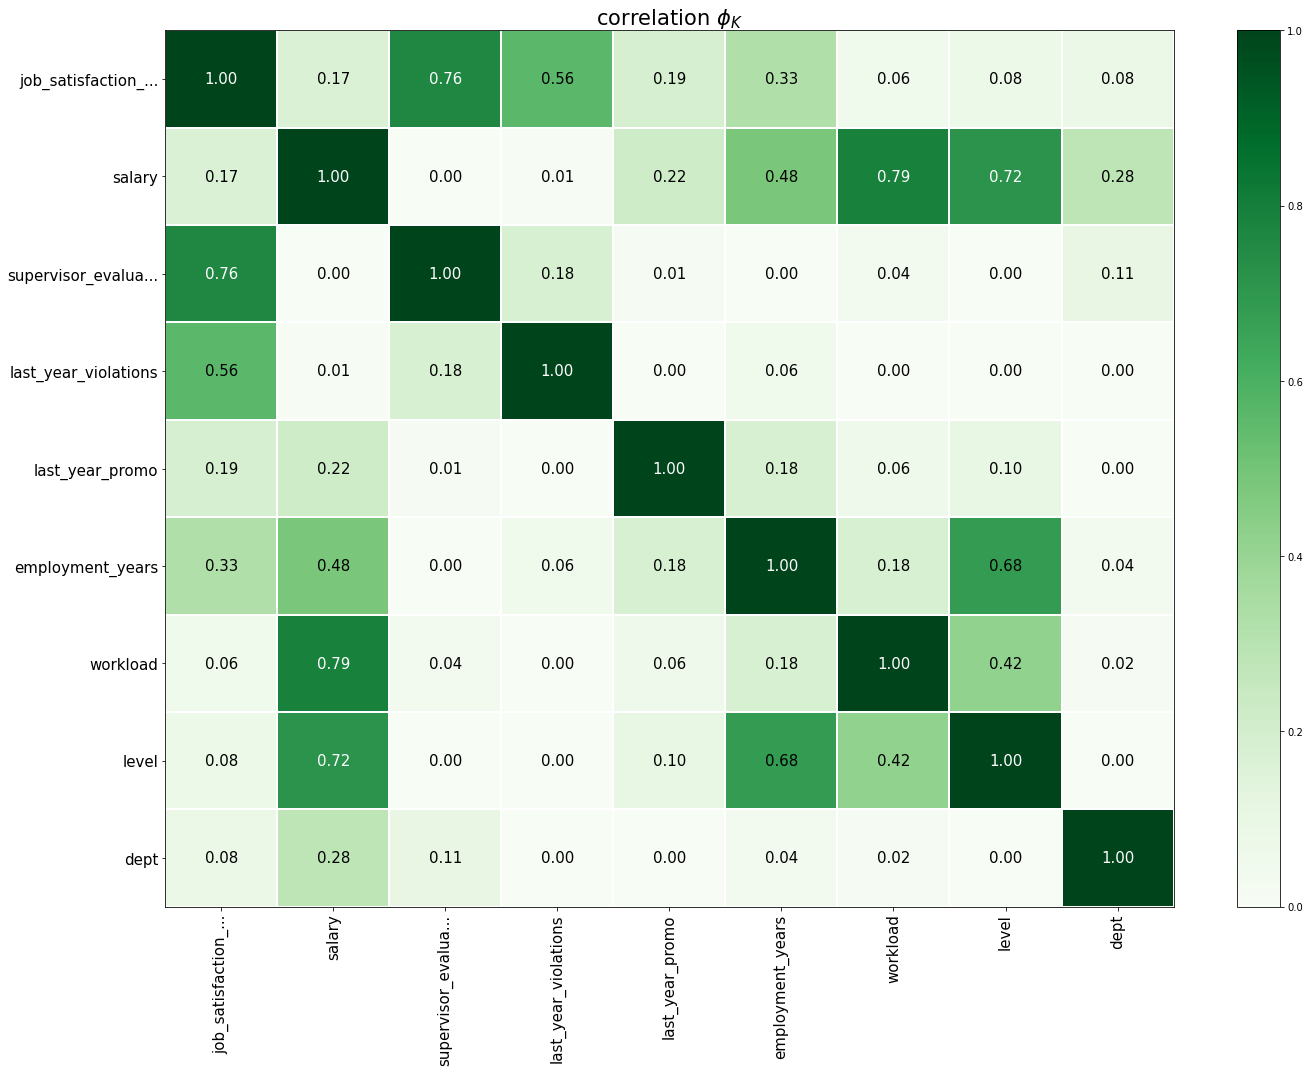

In [45]:
# Функции передаём значения матрицы корреляции phik_overview.values.
# Указываем наименования столбцов x_labels=phik_overview.columns.
# Указываем наименования строк y_labels=phik_overview.index.
# Указываем цвет градиентной отрисовки vmin=0, vmax=1, color_map='Greens'.
# Добавляем заголовок title=r'correlation $\phi_K$'.
# Увеличиваем размер шрифта fontsize_factor=1.5.
# Увеличиваем размер графика figsize=(20, 15).

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

</span><br><span style="color: purple; font-weight: bold">Вы мне ее посоветовали в прошлом проекте)</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ(ТЕСТОВАЯ)

In [46]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['salary']

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(X_test.set_index('id'),interval_cols=interval_cols)
print(phik_overview.shape) 

(8, 8)


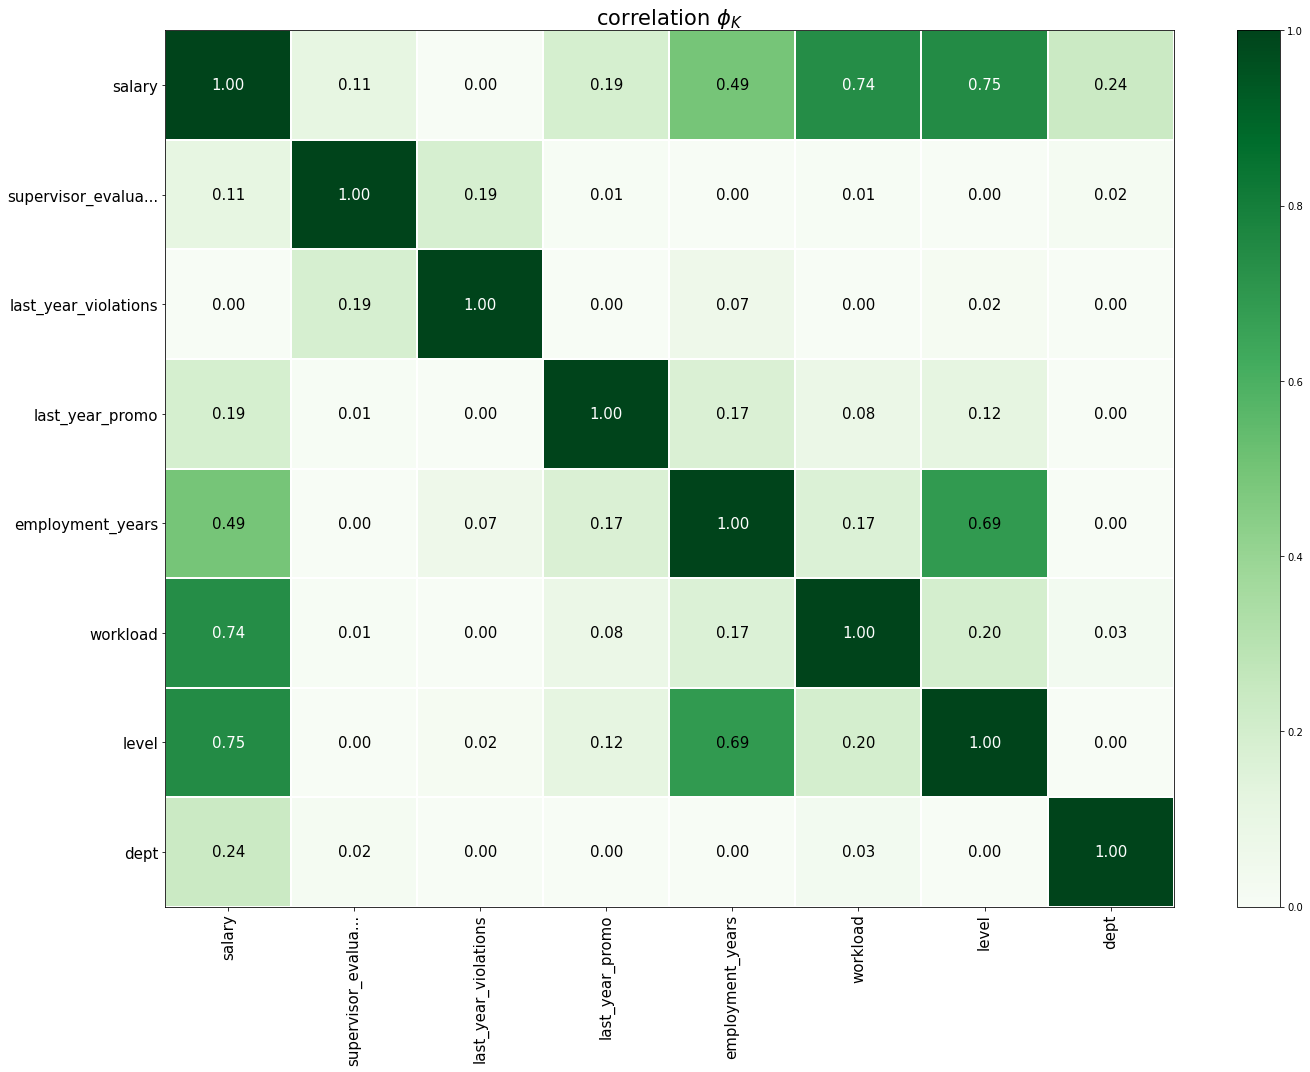

In [47]:
# Функции передаём значения матрицы корреляции phik_overview.values.
# Указываем наименования столбцов x_labels=phik_overview.columns.
# Указываем наименования строк y_labels=phik_overview.index.
# Указываем цвет градиентной отрисовки vmin=0, vmax=1, color_map='Greens'.
# Добавляем заголовок title=r'correlation $\phi_K$'.
# Увеличиваем размер шрифта fontsize_factor=1.5.
# Увеличиваем размер графика figsize=(20, 15).

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Вывод к шагу 1.3
- По результатам данного шага можно сказать, что отрицательных значений и аномалий в данных не обнаружено
- Есть выбросы, но они имеют вполне реальные значения, которые могут быть на самом деле, поэтому их не трогаем
- Выборки тестовая и тренировочная критических различий в распределениях признаков не имеют
- По диаграммам можно сказать >>> 

1) Большинство сотрудников работают в отделе продаж и уровень занимаемой должности junior

2) В среднем уровень загруженности - средний

3) Повышений в этой компании маловато, даже можно сказать их почти не делают )))

4) Подавляющее большинство сотрудников не нарушали ли сотрудник трудовой договор за последний год
- По результатом корреляционного анализа обнаружена сильная взаимосвязь у некоторых признаков, однако нет значений превышающих 0.9-0.95, следовательно о мультиколлениарности речи идти не может - ее нет.
- Утечки целевого признака не обнаружено

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Анализ корреляции выполнен корректно.</font>

</span><br><span style="color: purple; font-weight: bold">Старалась👍</span>

### Шаг 4. Подготовка данных

Подготовку признаков выполняем в пайплайне, дополнив пайплайн шага предобработки. При кодировании учитываем особенности признаков и моделей и используем как минимум два кодировщика. Таким образом:
- OneHotEncoder - 'last_year_violations', 'last_year_promo', 'dept'
- OrdinalEncoder - 'level', 'workload'
- StandardScaler, MinMaxScaler - 'salary', 'employment_years', 'supervisor_evaluation'

In [48]:
ohe_columns = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary']

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что разделяешь категории на порядковые и номинальные.</font>

Разделим тренировочную выборку на X_train и y_train

In [49]:
train = train.drop('id', axis=1)
# print(train.duplicated().sum())
train = train.drop_duplicates().reset_index(drop=True)

X_train= train.drop(['job_satisfaction_rate'], axis = 1)
y_train = train['job_satisfaction_rate']

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Разделим тестовую выборку с сохранением порядка данных

In [50]:
test = X_test.merge(y_test, on='id')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

In [51]:
X_test_new = test.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test_new = test['job_satisfaction_rate']

Добавляем OHE-кодирование, Ordinal-кодирование и масштабирование в пайплайн

In [52]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output =False)
        )
    ]
) 

In [53]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high', ' ']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [54]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

Возьмем одну линейную модель, а в качестве второй — дерево решений. Подберем гиперпараметры как минимум для одной модели с помощью GridSearchCV()

Вывод к шагу 1.4:
- разбили признаки на категориальные ранговые и количественные
- добавили в пайплан ohe и ord кодировщики и масштабирование количественных признаков

### Шаг 5. Обучение моделей

Тут нечего говорить, просто обучим подходящий нам модели DT и LinReg

In [55]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [56]:
distributions = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None, *range(2, 10)],
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
] 

Создадим фунцию для метрики SMAPE

In [57]:
def smape_score(y_true, y_pred):
    return 100/len(y_true) * np.sum(np.abs(y_true-y_pred)/((np.abs(y_true) + np.abs(y_pred))/2))

smape_scorer = make_scorer(smape_score, greater_is_better = False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

In [58]:
grid_search = GridSearchCV(
    pipe_final, 
    distributions, 
    cv = 5,
    scoring=smape_scorer, 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                                                           random_state=50)],
                          'models__max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9],
                          'models__min_samples_split': range(2, 10),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape_score, greater_is_better=False))

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

In [59]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:',grid_search.best_score_*-1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [60]:
y_pred_test = grid_search.best_estimator_.predict(X_test_new)
smape_test = smape_score(y_test_new, y_pred_test)
print ('Метрика лучшей модели на тестовой выборке:', smape_test)

Метрика лучшей модели на тестовой выборке: 13.57645616903248


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:182: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Т.к в условии нас просят - "В решении сохраните работу со всеми моделями, которые вы пробовали", -  Сохраняем все перебираемые модели из GridSearchCV 

In [61]:
results = pd.DataFrame(grid_search.cv_results_)
pd.set_option('display.max_colwidth', None)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__max_depth,param_models__min_samples_split,param_preprocessor__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026772,0.002418,0.009731,0.002662,"DecisionTreeRegressor(min_samples_split=8, random_state=50)",None,2,StandardScaler(),"{'models': DecisionTreeRegressor(min_samples_split=8, random_state=50), 'models__max_depth': None, 'models__min_samples_split': 2, 'preprocessor__num': StandardScaler()}",-15.276243,-15.356185,-16.726179,-16.404509,-15.956321,-15.943887,0.568410,32
1,0.026002,0.000858,0.008638,0.000176,"DecisionTreeRegressor(min_samples_split=8, random_state=50)",None,2,MinMaxScaler(),"{'models': DecisionTreeRegressor(min_samples_split=8, random_state=50), 'models__max_depth': None, 'models__min_samples_split': 2, 'preprocessor__num': MinMaxScaler()}",-15.138471,-15.450775,-16.663547,-16.373271,-15.739901,-15.873193,0.567584,29
2,0.024981,0.000696,0.008067,0.000238,"DecisionTreeRegressor(min_samples_split=8, random_state=50)",None,2,RobustScaler(),"{'models': DecisionTreeRegressor(min_samples_split=8, random_state=50), 'models__max_depth': None, 'models__min_samples_split': 2, 'preprocessor__num': RobustScaler()}",-15.216300,-15.353924,-16.567239,-16.447757,-15.964811,-15.910006,0.550380,31
3,0.022882,0.001278,0.007330,0.000168,"DecisionTreeRegressor(min_samples_split=8, random_state=50)",None,2,passthrough,"{'models': DecisionTreeRegressor(min_samples_split=8, random_state=50), 'models__max_depth': None, 'models__min_samples_split': 2, 'preprocessor__num': 'passthrough'}",-15.130258,-15.442868,-16.593678,-16.424362,-15.904400,-15.899113,0.558146,30
4,0.024402,0.000521,0.008324,0.000288,"DecisionTreeRegressor(min_samples_split=8, random_state=50)",None,3,StandardScaler(),"{'models': DecisionTreeRegressor(min_samples_split=8, random_state=50), 'models__max_depth': None, 'models__min_samples_split': 3, 'preprocessor__num': StandardScaler()}",-15.445877,-14.829889,-16.566037,-16.232081,-15.494508,-15.713678,0.615807,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.018986,0.001114,0.006832,0.000739,"DecisionTreeRegressor(min_samples_split=8, random_state=50)",9,9,passthrough,"{'models': DecisionTreeRegressor(min_samples_split=8, random_state=50), 'models__max_depth': 9, 'models__min_samples_split': 9, 'preprocessor__num': 'passthrough'}",-16.419783,-15.271354,-17.446536,-17.448185,-16.723594,-16.661890,0.803734,47
288,0.043874,0.030078,0.049743,0.032084,LinearRegression(),NaN,NaN,StandardScaler(),"{'models': LinearRegression(), 'preprocessor__num': StandardScaler()}",-25.205444,-24.956479,-26.082386,-25.083587,-23.700211,-25.005621,0.763144,291
289,0.059819,0.031737,0.022140,0.027292,LinearRegression(),NaN,NaN,MinMaxScaler(),"{'models': LinearRegression(), 'preprocessor__num': MinMaxScaler()}",-25.205444,-24.956479,-26.082386,-25.083587,-23.700211,-25.005621,0.763144,290
290,0.087613,0.001580,0.008780,0.000357,LinearRegression(),NaN,NaN,RobustScaler(),"{'models': LinearRegression(), 'preprocessor__num': RobustScaler()}",-25.205444,-24.956479,-26.082386,-25.083587,-23.700211,-25.005621,0.763144,291


Вывод к шагу 1.5:
- обучили две модели - DT и LinReg
- перебрали гиперпараметры для DT
- написали функцию для smape метрики 
- ЛУЧШЕЙ МОДЕЛЬЮ СТАЛА - DecisionTreeRegressor(min_samples_split=8, random_state=50)

1) Метрика лучшей модели на тренировочной выборке: 14.964210147314947
2) Метрика лучшей модели на тестовой выборке: 13.56284455219568

На мой взгляд это отличный результат, так как Критерий успеха: SMAPE ≤ 15 на тестовой выборке.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Шаг 6. Оформление выводов

Модель DecisionTreeRegressor(min_samples_split=8, random_state=50) справилась лучше, так как в целевой признак во первых - количественный, во вторых - непрерывный, поэтому модель DT хорошо справилась с задачей. Также модель DT хорошо справляется с признаками в которых присутсвуют нелинейные зависимости, это тоже сыграло немалую роль в выборе лучшей модели, как и наличие большего количества гиперпараметров чем в LinReg.

Итак первая задача - построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика, - ВЫПОЛНЕНА.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Задача

### Шаг 1. Загрузка данных

In [62]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
X_test_quit = pd.read_csv('/datasets/test_features.csv')
y_test_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [63]:
check_data(train_quit)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
первые 5 строк *************************************************************************************************

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


название столбцов **************************************************************************************************


Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

количество пропусков ***********************************************************************************************
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0


In [64]:
check_data(X_test_quit)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
первые 5 строк *****************************************************************************************************


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


название столбцов **************************************************************************************************


Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

количество пропусков ***********************************************************************************************
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0


In [65]:
check_data(y_test_quit)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
первые 5 строк *****************************************************************************************************


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


название столбцов **************************************************************************************************


Index(['id', 'quit'], dtype='object')

количество пропусков ***********************************************************************************************
id      0
quit    0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0


Вывод к шагу 2.1:
- данные выгружены и просмотрены
- явных дубликатов не обнаружено
- есть пропуски в тестовой выборке со входным признаком
- все данные соответствуют форматам

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Шаг 2. Предобработка данных

Аналогично с предобработкой из 1 задачи

In [66]:
for column in train_quit.drop(['id', 'employment_years', 'supervisor_evaluation', 'salary'], axis=1).columns:
    print(f'Уникальные значения в признаке {column}: ', train_quit[column].sort_values().unique())
    print(train_quit[column].value_counts())

Уникальные значения в признаке dept:  ['hr' 'marketing' 'purchasing' 'sales' 'technology']
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64
Уникальные значения в признаке level:  ['junior' 'middle' 'sinior']
junior    1949
middle    1694
sinior     357
Name: level, dtype: int64
Уникальные значения в признаке workload:  ['high' 'low' 'medium']
medium    2118
low       1208
high       674
Name: workload, dtype: int64
Уникальные значения в признаке last_year_promo:  ['no' 'yes']
no     3887
yes     113
Name: last_year_promo, dtype: int64
Уникальные значения в признаке last_year_violations:  ['no' 'yes']
no     3455
yes     545
Name: last_year_violations, dtype: int64
Уникальные значения в признаке quit:  ['no' 'yes']
no     2872
yes    1128
Name: quit, dtype: int64


In [67]:
for column in X_test_quit.drop(['id', 'employment_years', 'supervisor_evaluation', 'salary'], axis=1).columns:
    print(f'Уникальные значения в признаке {column}: ', X_test_quit[column].sort_values().unique())
    print(X_test_quit[column].value_counts())

Уникальные значения в признаке dept:  [' ' 'hr' 'marketing' 'purchasing' 'sales' 'technology' nan]
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64
Уникальные значения в признаке level:  ['junior' 'middle' 'sinior' nan]
junior    974
middle    854
sinior    171
Name: level, dtype: int64
Уникальные значения в признаке workload:  [' ' 'high' 'low' 'medium']
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64
Уникальные значения в признаке last_year_promo:  ['no' 'yes']
no     1937
yes      63
Name: last_year_promo, dtype: int64
Уникальные значения в признаке last_year_violations:  ['no' 'yes']
no     1738
yes     262
Name: last_year_violations, dtype: int64


In [68]:
# X_test_quit.loc[X_test_quit['dept'] == ' ', 'dept'] = np.nan
# X_test_quit.loc[X_test_quit['workload'] == ' ', 'workload'] = np.nan

Вывод к шагу 2.2
- неявные дубликаты не обнаружены
- пропуски в виде ' ' были заменены на np.nan и позже мы разберемся с ними в пайплайне

### Шаг 3. Исследовательский анализ данных

#### Проведем исследовательский анализ данных

Повзаимствуем все функции из предыдущей задачи на данном этапе

,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0


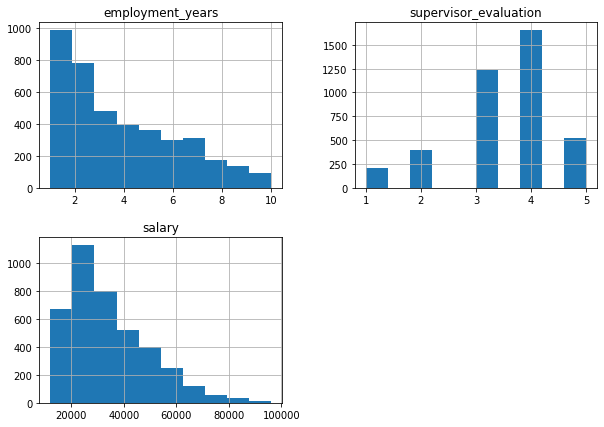

In [69]:
stat(train_quit)

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0


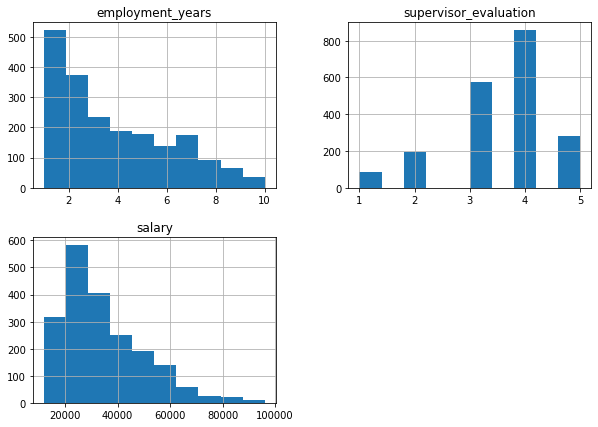

In [70]:
stat(X_test_quit)

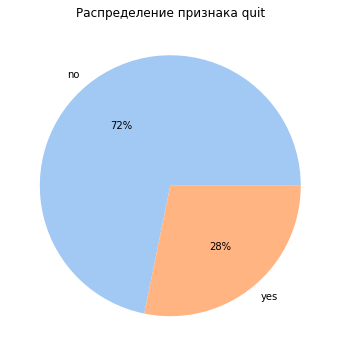

In [71]:
pie(y_test_quit, 'quit')

Посмотрим на все признаки поближе, пока на первый взгляд все хорошо), распределения признаков у тренировочной и тестойвой выборок совпадают

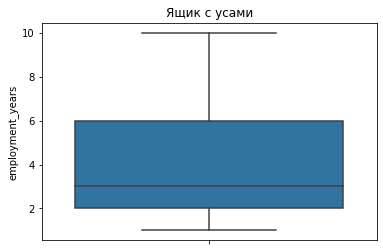

In [72]:
bxplt(train_quit, 'employment_years')

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


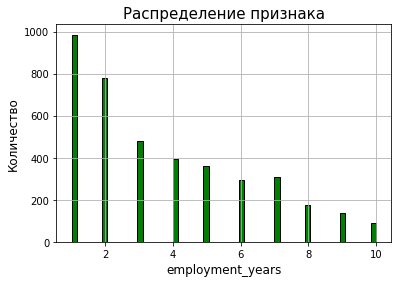

In [73]:
hst(train_quit, 'employment_years')

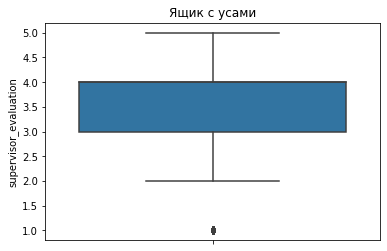

In [74]:
bxplt(train_quit, 'supervisor_evaluation')

count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


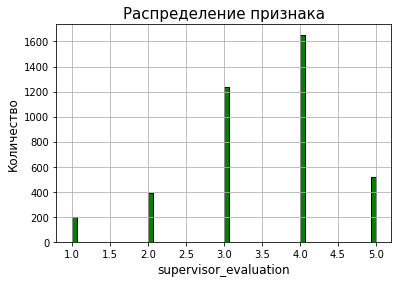

In [75]:
hst(train_quit, 'supervisor_evaluation')

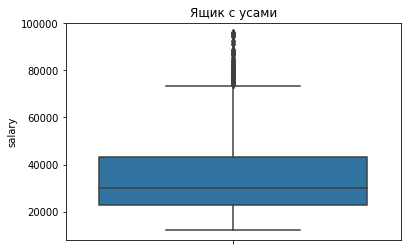

In [76]:
bxplt(train_quit, 'salary')

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


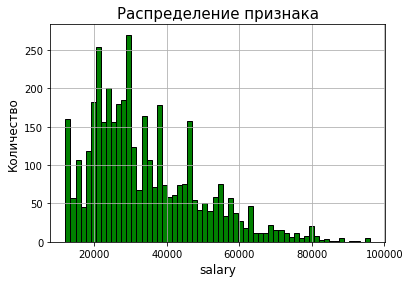

In [77]:
hst(train_quit, 'salary')

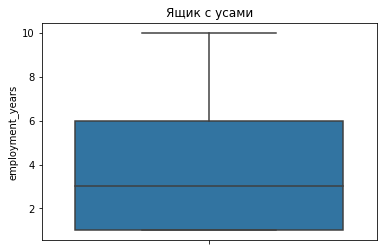

In [78]:
bxplt(X_test_quit, 'employment_years')

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


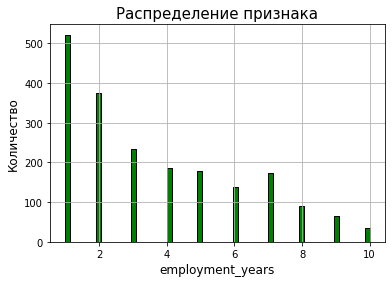

In [79]:
hst(X_test_quit, 'employment_years')

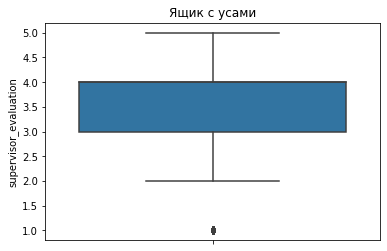

In [80]:
bxplt(X_test_quit, 'supervisor_evaluation')

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


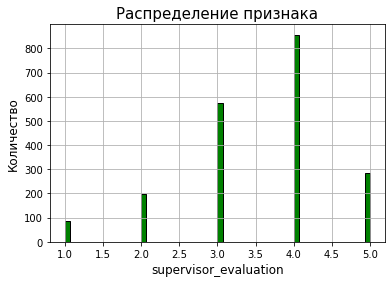

In [81]:
hst(X_test_quit, 'supervisor_evaluation')

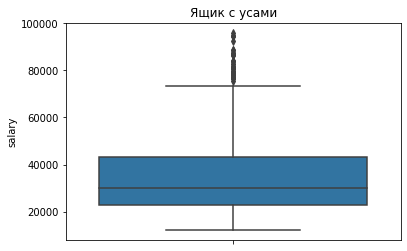

In [82]:
bxplt(X_test_quit, 'salary')

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


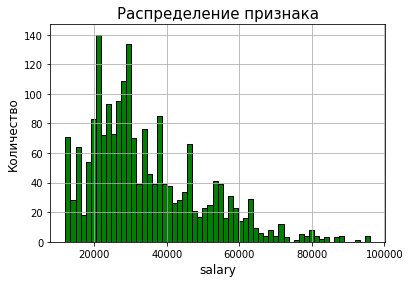

In [83]:
hst(X_test_quit, 'salary')

С распределениями все нормально, пррисутствуют как и непрерывные так и дискретные количественные признаки, тестовая выборка совпадает по распределениям с тренировочной, есть выбросы, однако они имеют вполне реальные значения, аномалий и отрицательных значений нет

Теперь категориальные признаки

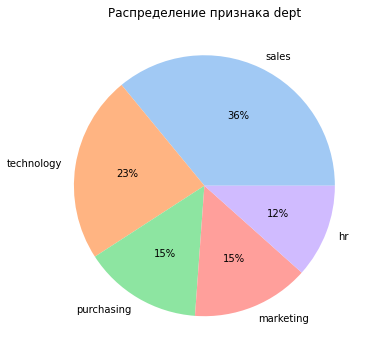

In [84]:
pie(train_quit, 'dept')

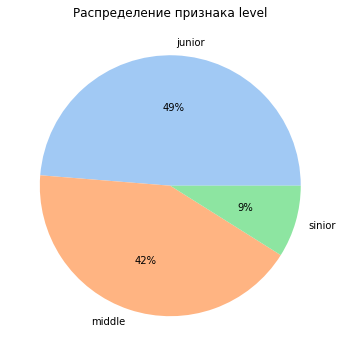

In [85]:
pie(train_quit, 'level')

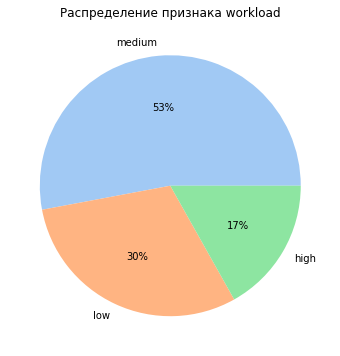

In [86]:
pie(train_quit, 'workload')

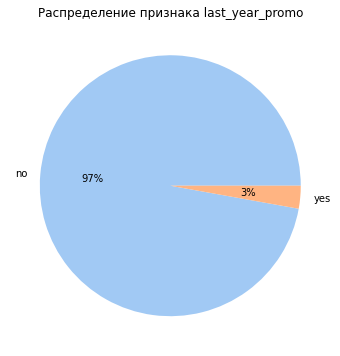

In [87]:
pie(train_quit, 'last_year_promo')

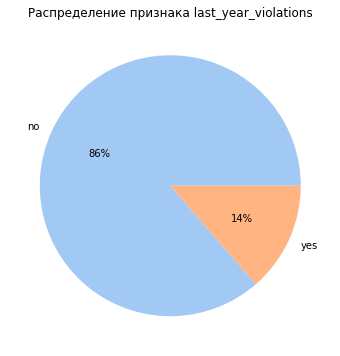

In [88]:
pie(train_quit, 'last_year_violations')

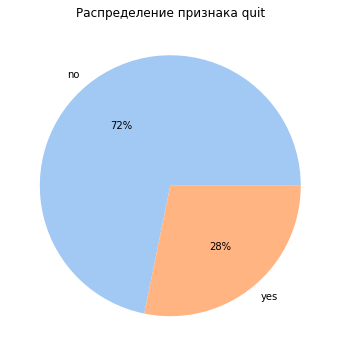

In [89]:
pie(train_quit, 'quit')

Распределение целевого признака в тренировочной выборке совпадает с распределением тестового целевого признака

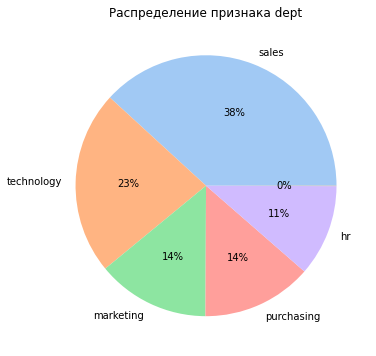

In [90]:
pie(X_test_quit, 'dept')

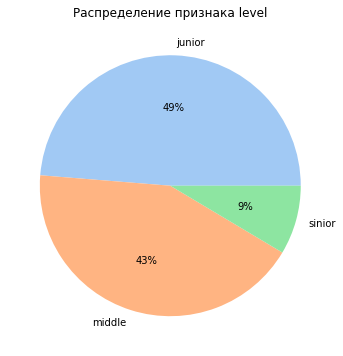

In [91]:
pie(X_test_quit, 'level')

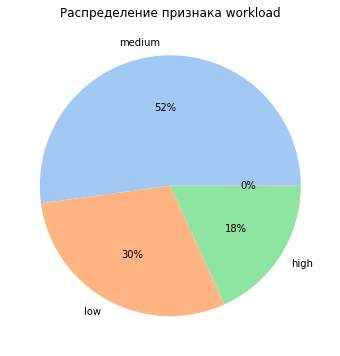

In [92]:
pie(X_test_quit, 'workload')

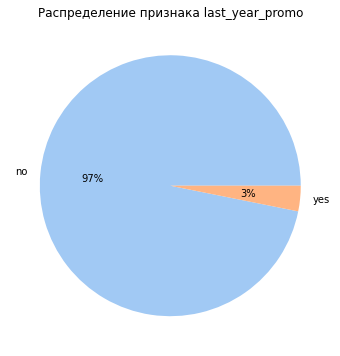

In [93]:
pie(X_test_quit, 'last_year_promo')

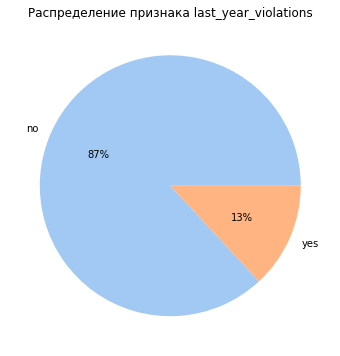

In [94]:
pie(X_test_quit, 'last_year_violations')

Распределения тестовой и тренировочной выборок категориальных признаков тоже совпадают

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

####  Составим портрет «уволившегося сотрудника»

Сгрупируем признаки с помощью groupby() и напишем функцию >>> 

In [95]:
def quit(name):
    df = depts = train_quit.groupby([name])['quit'].value_counts(normalize=True)
    df.loc[df.index.get_level_values(1) == 'yes'].plot(title=f'Распределение признака {name} по увольнению сотрудников',
                                                      kind='bar', figsize=(14, 6))
    plt.show()

In [96]:
# def quit(name):
#     train_quit.loc[train_quit['quit'] == 'yes', name].value_counts(normalize=True).plot(y = 'count', kind = 'bar', title = f'Распределение признака {name} по увольнению сотрудников', figsize = (14, 6))
#     plt.show()

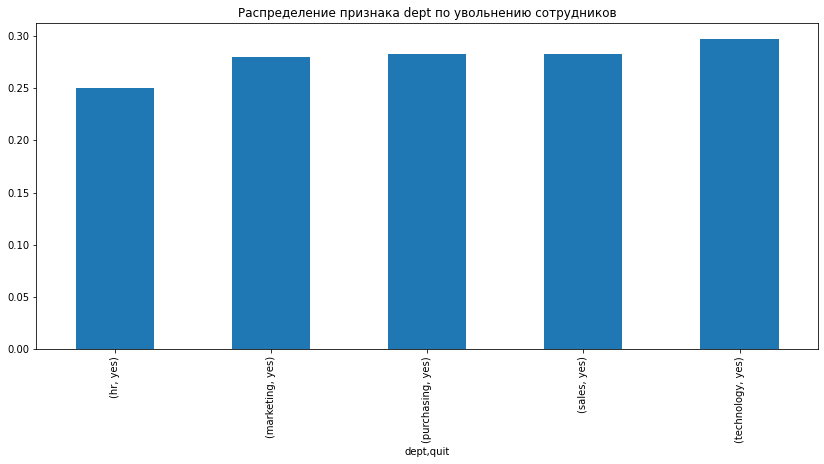

In [97]:
quit('dept')

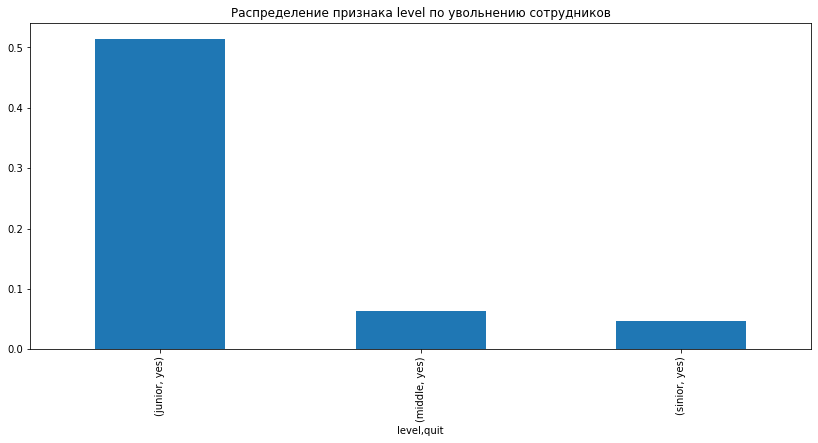

In [98]:
quit('level')

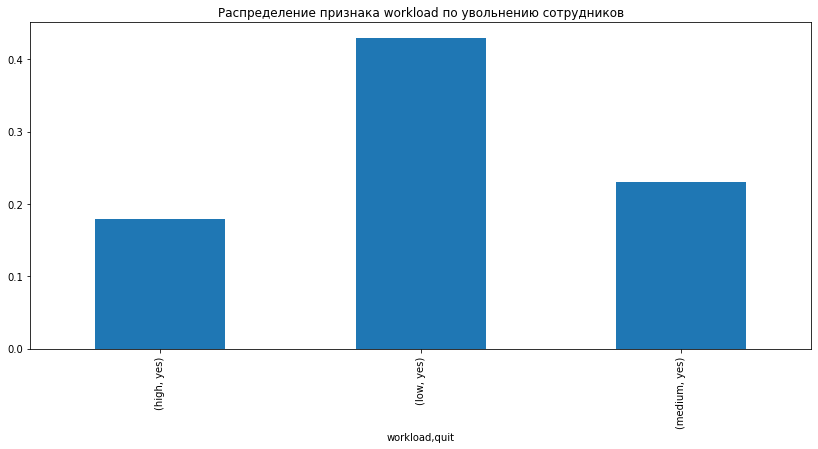

In [99]:
quit('workload')

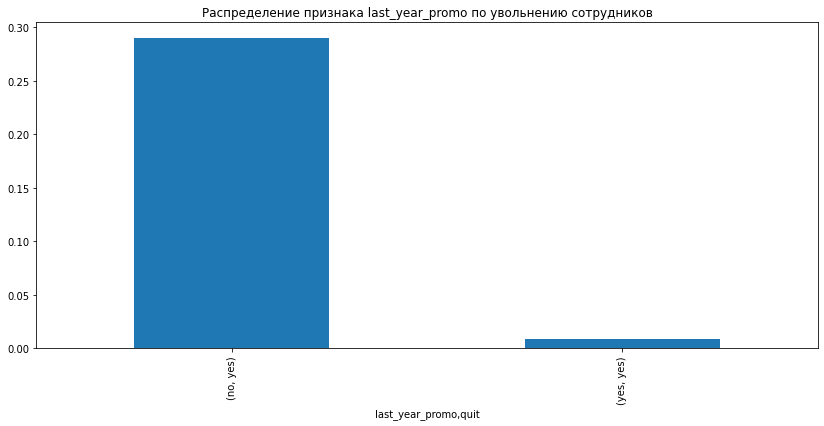

In [100]:
quit('last_year_promo')

Кстати разве это не утечка целевого признака? При корреляционном анализе нужно будет посмотреть на взаимосвязь этих 2 признаков


P.s я ошиблась, на корреляционной матрицы между признаками "quit" и "last_year_promo" взаимосвязь почти не наблюдается

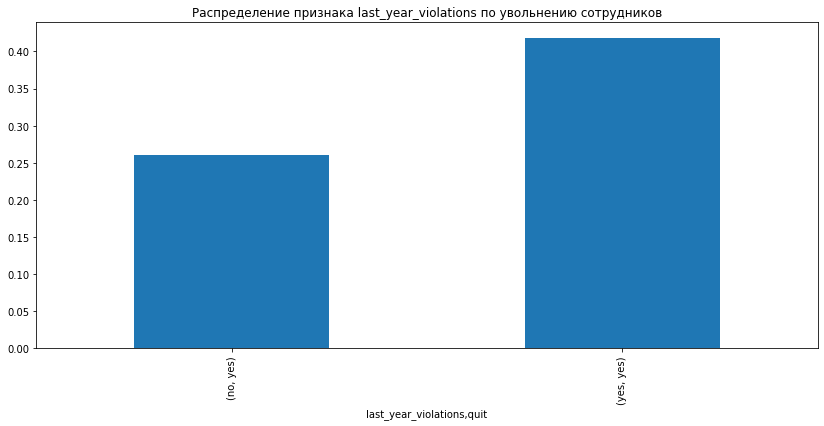

In [101]:
quit('last_year_violations')

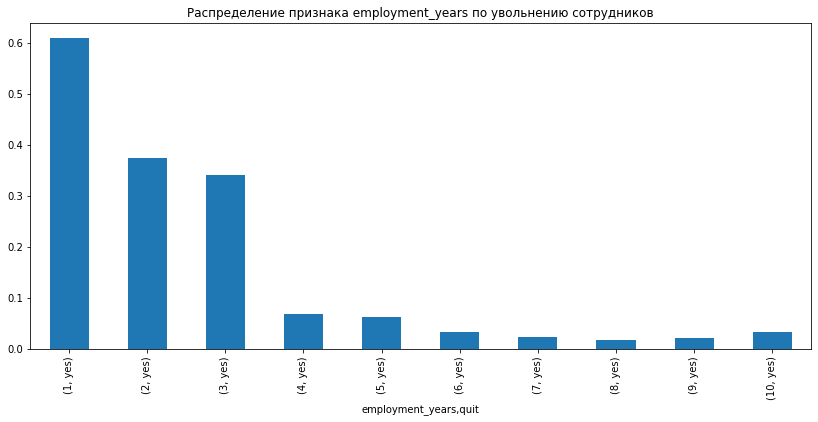

In [102]:
quit('employment_years')

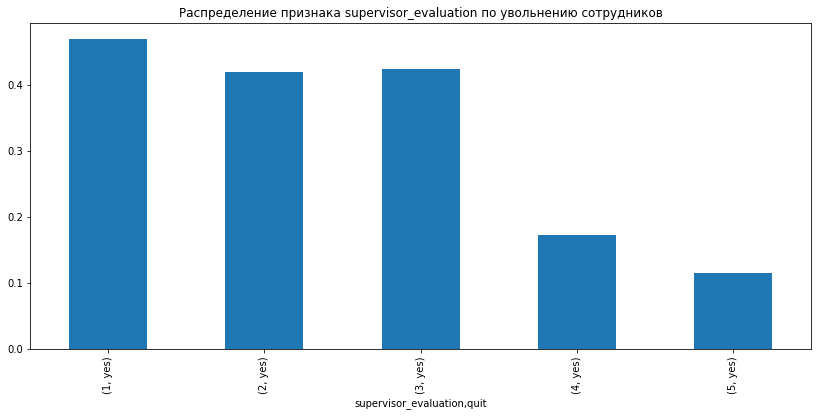

In [103]:
quit('supervisor_evaluation')

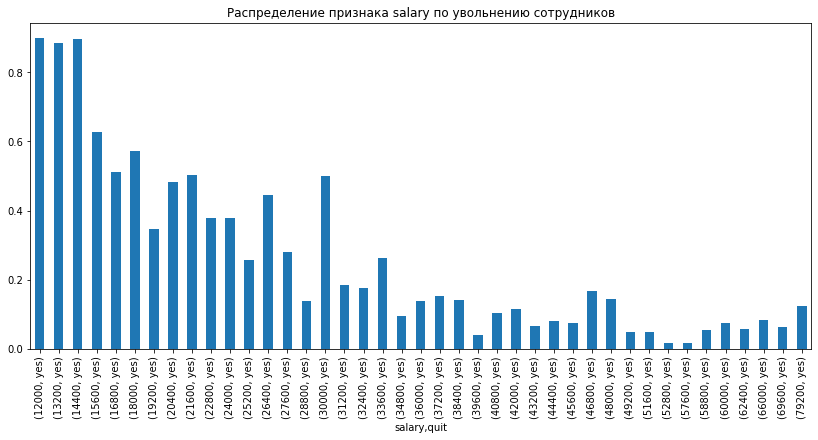

In [104]:
quit('salary')

ПОРТРЕТ "УВОЛИВШЕГОСЯ СОТРУДНИКА"

- Итак, такой сотрудник скорее всего junior работающий в отделе продаж около года, с маленькой или средней загруженностью, у которого точно не было повышения, при этом обычно такой сотрудник не нарушает трудовой договор, а работадатель оценивает его на 3/5, и зарплата у такого сотрудника от 12000 до 30000

#### Визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников

,job_satisfaction_rate,quit
id,,
130604,0.74,no
825977,0.75,no
418490,0.60,yes
555320,0.72,no
826430,0.08,yes
...,...,...
405257,0.28,no
370925,0.21,yes
857722,0.39,no


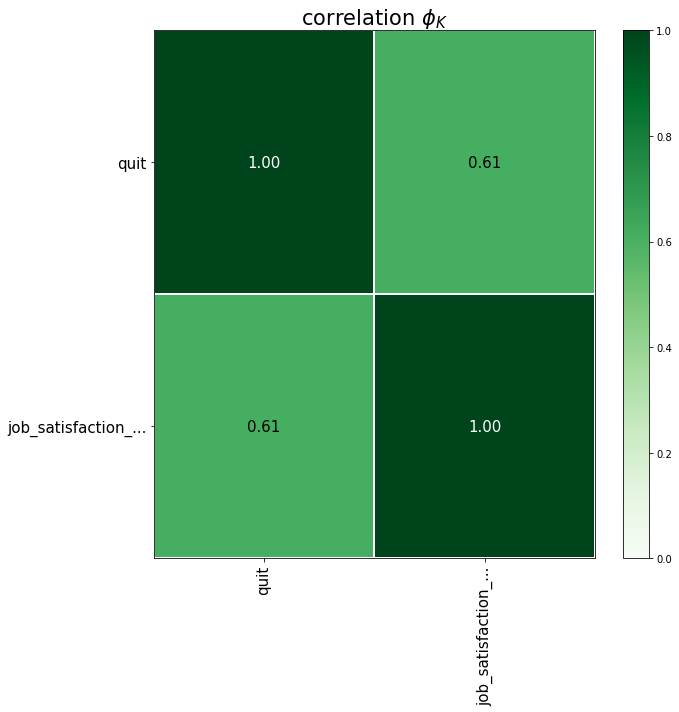

In [105]:
merged_y_test=y_test.merge(y_test_quit, on='id')
merged_y_test=merged_y_test.set_index('id')
interval_cols = ['job_satisfaction_rate']
phik_overview = phik_matrix(merged_y_test,interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(10, 10)
)
merged_y_test

Есть заметная связь между уровнем удовлетворённости сотрудника работой в компании и его увольнением.

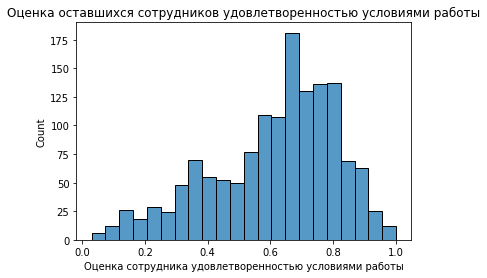

In [106]:
sns.histplot(data = merged_y_test.loc[merged_y_test['quit']=='no'], x='job_satisfaction_rate')
plt.xlabel('Оценка сотрудника удовлетворенностью условиями работы')
plt.title('Оценка оставшихся сотрудников удовлетворенностью условиями работы')
plt.show()

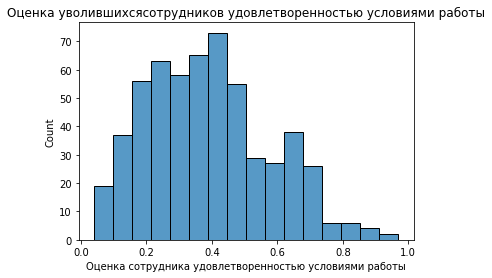

In [107]:
sns.histplot(data = merged_y_test.loc[merged_y_test['quit']=='yes'], x='job_satisfaction_rate')
plt.xlabel('Оценка сотрудника удовлетворенностью условиями работы')
plt.title('Оценка уволившихсясотрудников удовлетворенностью условиями работы')
plt.show()

Предположение подтвердилось, значит, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

In [108]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['salary']

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(train_quit.set_index('id'),interval_cols=interval_cols)
print(phik_overview.shape) 

(9, 9)


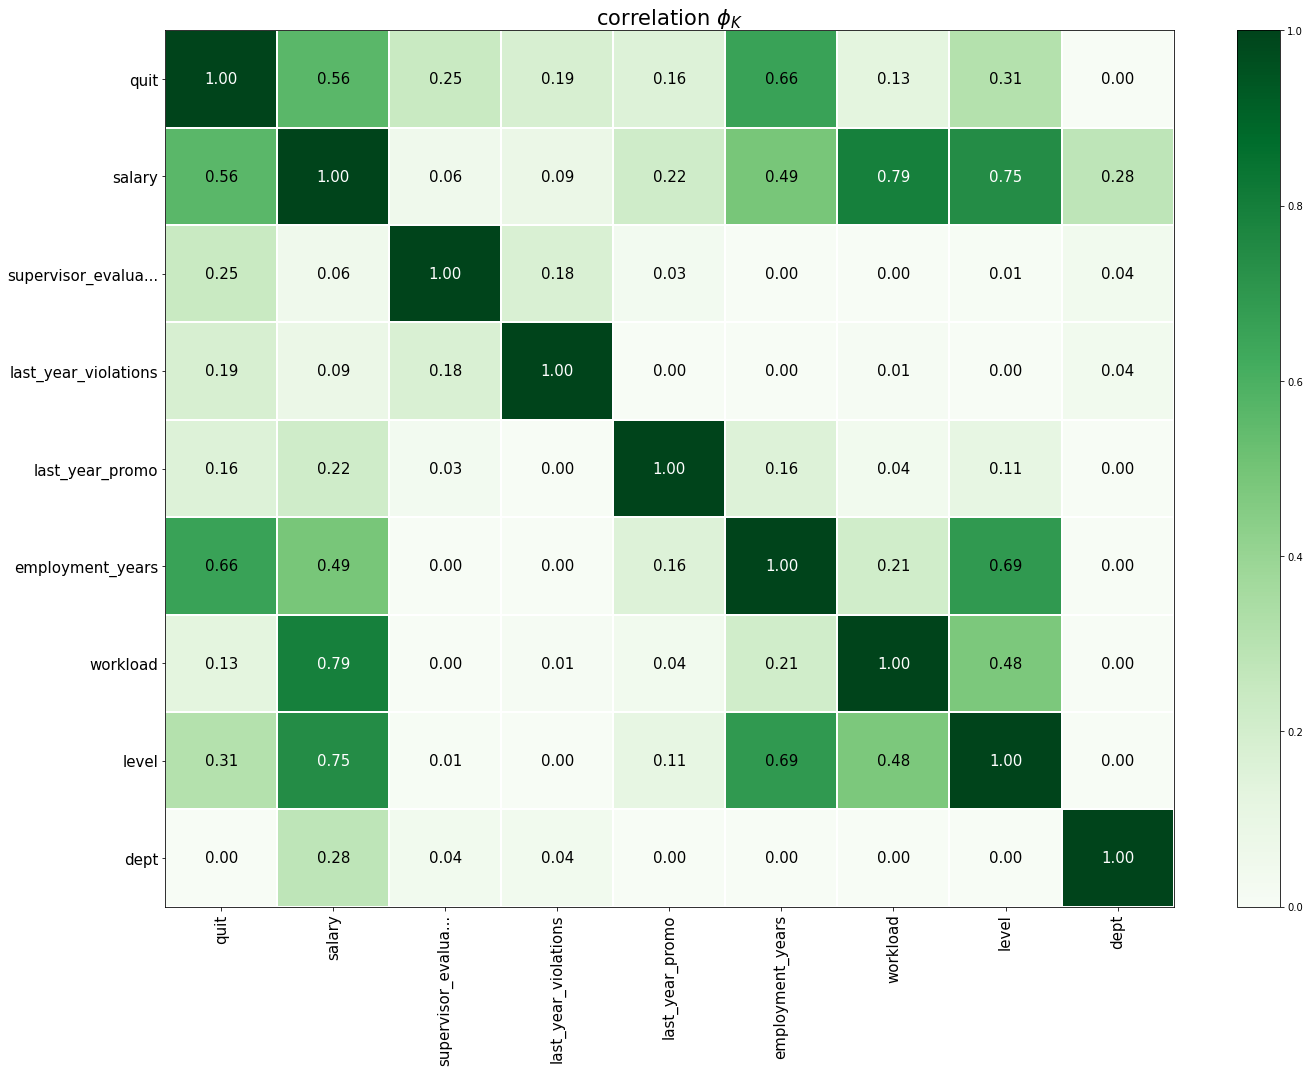

In [109]:
# Функции передаём значения матрицы корреляции phik_overview.values.
# Указываем наименования столбцов x_labels=phik_overview.columns.
# Указываем наименования строк y_labels=phik_overview.index.
# Указываем цвет градиентной отрисовки vmin=0, vmax=1, color_map='Greens'.
# Добавляем заголовок title=r'correlation $\phi_K$'.
# Увеличиваем размер шрифта fontsize_factor=1.5.
# Увеличиваем размер графика figsize=(20, 15).

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

- Мультиколлениарности нет

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Вывод к шагу 2.3:
- С распределениями все нормально, присутствуют как и непрерывные так и дискретные количественные признаки, тестовая выборка совпадает по распределениям с тренировочной, есть выбросы, однако они имеют вполне реальные значения, аномалий и отрицательных значений нет
- Распределения тестовой и тренировочной выборок категориальных признаков тоже совпадают
- Уровень удовлетворённости сотрудника работой в компании заметно влияет на то, уволится ли сотрудник
- Мультиколлениарности нет

ПОРТРЕТ "УВОЛИВШЕГОСЯ СОТРУДНИКА"

- Итак, такой сотрудник скорее всего junior работающий в отделе продаж около года, с маленькой или средней загруженностью, у которого точно не было повышения, при этом обычно такой сотрудник не нарушает трудовой договор, а работадатель оценивает его на 3/5, и зарплата у такого сотрудника от 12000 до 30000

### Шаг 4. Добавление нового входного признака

In [110]:
train_quit['job_satisfaction_rate'] = grid_search.predict(train_quit.drop(['quit'], axis = 1))
X_test_quit['job_satisfaction_rate'] = grid_search.predict(X_test_quit)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:182: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что добавляется предсказание предыдущей модели.</font>

In [111]:
X_test_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.885000
1,686555,hr,junior,medium,1,no,no,4,30000,0.681429
2,467458,sales,middle,low,5,no,no,4,19200,0.654000
3,418655,sales,middle,low,6,no,no,4,19200,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,0.812500


In [112]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.600000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


Вывод к шагу 2.4:
- добавлен новый входной признак 'job_satisfaction_rate'

### Шаг 5. Подготовка данных

In [113]:
train_quit.head(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.600000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


In [114]:
X_test_quit

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.885000
1,686555,hr,junior,medium,1,no,no,4,30000,0.681429
2,467458,sales,middle,low,5,no,no,4,19200,0.654000
3,418655,sales,middle,low,6,no,no,4,19200,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,0.812500
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.508571
1996,109582,technology,middle,low,3,no,no,2,21600,0.151429
1997,305653,technology,junior,low,1,no,no,3,14400,0.170000
1998,160233,technology,middle,low,8,no,no,1,32400,0.518571


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше всегда ограничивать методами .head(), .tail(), sample(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

In [115]:
y_test_quit

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


In [116]:
ohe_columns = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary', 'job_satisfaction_rate']

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [117]:
train_quit = train_quit.drop('id', axis=1)

# print(train_quit.duplicated().sum())
train_quit = train_quit.drop_duplicates().reset_index(drop=True)
# print(train_quit.duplicated().sum())

train_quit['quit'] = train_quit['quit'].apply(lambda x: 0 if x == 'no' else 1)

In [118]:
X_train_quit= train_quit.drop(['quit'], axis = 1)
y_train_quit = train_quit['quit']

In [119]:
test_quit = X_test_quit.merge(y_test_quit, on='id')
test_quit['quit'] = test_quit['quit'].apply(lambda x: 0 if x == 'no' else 1)

In [120]:
X_test_quit_new = test_quit.drop(['id', 'quit'], axis=1)
y_test_quit_new = test_quit['quit']

In [121]:
# y_test_quit_new

In [122]:
# создаём итоговый пайплайн: подготовка данных и модель
RANDOM_STATE = 42
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Вывод к шагу 2.5:

Подготовили признаки так же, как и в первой задаче: выполнили подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывали особенности признаков и моделей и использовали как минимум два кодировщика.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Шаг 6. Обучение модели

In [123]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__max_features': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    }
    
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train_quit, y_train_quit)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
probabilities = randomized_search.predict_proba(X_test_quit_new)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test_quit_new, probabilities_one))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:182: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [124]:
results_quit = pd.DataFrame(randomized_search.cv_results_)
pd.set_option('display.max_colwidth', None)
display(results_quit)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_features,param_models__max_depth,param_models,param_models__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019562,0.001769,0.007509,0.000169,passthrough,6,9,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': 'passthrough', 'models__max_features': 6, 'models__max_depth': 9, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.780460,0.816715,0.829263,0.861953,0.831122,0.823903,0.026335,10
1,0.019588,0.000286,0.008946,0.000139,RobustScaler(),4,3,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': RobustScaler(), 'models__max_features': 4, 'models__max_depth': 3, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.862309,0.849074,0.856099,0.829708,0.845430,0.848524,0.011058,9
2,0.016888,0.000462,0.007466,0.000446,passthrough,7,6,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': 'passthrough', 'models__max_features': 7, 'models__max_depth': 6, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.895625,0.899748,0.864000,0.904392,0.881076,0.888968,0.014725,1
3,0.019657,0.000578,0.008698,0.000321,RobustScaler(),3,3,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': RobustScaler(), 'models__max_features': 3, 'models__max_depth': 3, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.845089,0.859864,0.841128,0.837935,0.859263,0.848656,0.009192,8
4,0.020159,0.000616,0.017398,0.000466,MinMaxScaler(),NaN,NaN,KNeighborsClassifier(),3,"{'preprocessor__num': MinMaxScaler(), 'models__n_neighbors': 3, 'models': KNeighborsClassifier()}",0.857398,0.854745,0.872612,0.843867,0.865562,0.858837,0.009776,7
5,0.019535,0.000481,0.008908,0.000238,MinMaxScaler(),2,7,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 2, 'models__max_depth': 7, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.864647,0.892725,0.875608,0.860905,0.876004,0.873978,0.011101,6
6,0.019502,0.000533,0.009171,0.000333,MinMaxScaler(),4,6,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 4, 'models__max_depth': 6, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.863079,0.883543,0.886900,0.888176,0.879207,0.880181,0.009097,3
7,0.018945,0.000292,0.008691,0.000308,MinMaxScaler(),10,2,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 10, 'models__max_depth': 2, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.871413,0.863177,0.877180,0.867213,0.897045,0.875206,0.011864,5
8,0.019717,0.000420,0.008794,0.000142,StandardScaler(),4,5,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': StandardScaler(), 'models__max_features': 4, 'models__max_depth': 5, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.878908,0.866018,0.896442,0.862694,0.880157,0.876844,0.011973,4
9,0.018999,0.000419,0.008657,0.000313,StandardScaler(),3,6,"DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)",NaN,"{'preprocessor__num': StandardScaler(), 'models__max_features': 3, 'models__max_depth': 6, 'models': DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42)}",0.888702,0.861412,0.898479,0.880799,0.888087,0.883496,0.012391,2


Вывод к шагу 2.6:
- Задача 2 - построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. - ВЫПОЛНЕНА
- Лучшей моделью для выполнения данной задачи оказалась -  DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42), Метрика лучшей модели на тренировочной выборке: 0.888968105848002, Площадь ROC-кривой: 0.9211394189928682 =>ROC-AUC ≥ 0.91 на тестовой выборке. Критерий успеха показывает, что модель довольно хорошо справляется с предсказаниями как на тренировочной, так и на тестовой выборке.

### Шаг 7. Выводы

- Лучшей моделью оказалась - DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42), так как у нее можно перебирать большое количество гиперпараметров и она хорошо справляется с задачами классификации, и хорошо работает с признаками с нелинейной зависимостью

## Общий вывод

В ходе данного проекто были выполнены данные две задачи:

1) Задача 1. - построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

2) Задача 2. - построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Для выполнения ПЕРВОЙ задачи были проделаны следующие шаги и на каждом из них были сделаны следующие выводы:

- Шаг 1. Загрузка данных - данные выгружены, явных дубликатов нет, есть пропуски, все данные соответствуют форматам
- Шаг 2. Предобработка данных - неявные дубликаты не обнаружены, пропуски в виде ' ' были заменены на np.nan и позже мы разберемся с ними в пайплайне
- Шаг 3. Исследовательский анализ данных - 
По результатам данного шага можно сказать, что отрицательных значений и аномалий в данных не обнаружено. Есть выбросы, но они имеют вполне реальные значения, которые могут быть на самом деле, поэтому их не трогаем. Выборки тестовая и тренировочная критических различий в распределениях признаков не имеют. По диаграммам можно сказать >>>

1) Большинство сотрудников работают в отделе продаж и уровень занимаемой должности junior

2) В среднем уровень загруженности - средний

3) Повышений в этой компании маловато, даже можно сказать их почти не делают )))

4) Подавляющее большинство сотрудников не нарушали ли сотрудник трудовой договор за последний год

По результатом корреляционного анализа обнаружена сильная взаимосвязь у некоторых признаков, однако нет значений превышающих 0.9-0.95, следовательно о мультиколлениарности речи идти не может - ее нет.
Утечки целевого признака не обнаружено

- Шаг 4. Подготовка данных - разбили признаки на категориальные ранговые и количественные, добавили в пайплан ohe и ord кодировщики и масштабирование количественных признаков

- Шаг 5. Обучение моделей - обучили две модели - DT и LinReg, перебрали гиперпараметры для DT, написали функцию для smape метрики

ЛУЧШЕЙ МОДЕЛЬЮ СТАЛА - DecisionTreeRegressor(min_samples_split=8, random_state=50)

1) Метрика лучшей модели на тренировочной выборке: 14.964210147314947 

2) Метрика лучшей модели на тестовой выборке: 13.56284455219568

На мой взгляд это отличный результат, так как Критерий успеха: SMAPE ≤ 15 на тестовой выборке.

Для выполнения ВТОРОЙ задачи были проделаны следующие шаги и на каждом из них были сделаны следующие выводы:

- Шаг 1. Загрузка данных - данные выгружены и просмотрены, явных дубликатов не обнаружено, есть пропуски в тестовой выборке со входным признаком, все данные соответствуют форматам

- Шаг 2. Предобработка данных - неявные дубликаты не обнаружены, пропуски в виде ' ' были заменены на np.nan и позже мы разберемся с ними в пайплайне

- Шаг 3. Исследовательский анализ данных - С распределениями все нормально, присутствуют как и непрерывные так и дискретные количественные признаки, тестовая выборка совпадает по распределениям с тренировочной, есть выбросы, однако они имеют вполне реальные значения, аномалий и отрицательных значений нет. Распределения тестовой и тренировочной выборок категориальных признаков тоже совпадают. Уровень удовлетворённости сотрудника работой в компании заметно влияет на то, уволится ли сотрудник. Мультиколлениарности нет

ПОРТРЕТ "УВОЛИВШЕГОСЯ СОТРУДНИКА"

Итак, такой сотрудник скорее всего junior работающий в отделе продаж около года, с маленькой или средней загруженностью, у которого точно не было повышения, при этом обычно такой сотрудник не нарушает трудовой договор, а работадатель оценивает его на 3/5, и зарплата у такого сотрудника от 12000 до 30000

- Шаг 4. Добавление нового входного признака - добавлен новый входной признак 'job_satisfaction_rate'

- Шаг 5. Подготовка данных - Подготовили признаки так же, как и в первой задаче: выполнили подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывали особенности признаков и моделей и использовали как минимум два кодировщика.

- Шаг 6. Обучение модели - Обучили 4 разные модели с разными гиперпараметрами. Лучшей моделью для выполнения данной задачи оказалась -  DecisionTreeClassifier(max_depth=6, max_features=7, random_state=42), Метрика лучшей модели на тренировочной выборке: 0.888968105848002, Площадь ROC-кривой: 0.9211394189928682 =>ROC-AUC ≥ 0.91 на тестовой выборке. Критерий успеха показывает, что модель довольно хорошо справляется с предсказаниями как на тренировочной, так и на тестовой выборке.

ДОПОЛНИТЕЛЬНЫЕ ПРЕДЛОЖЕНИЯ ДЛЯ БИЗНЕСА >>>

Для того чтобы в будущем уменьшить вероятность ухода сотрудника нужно принять следующие меры(на мой взгляд):

1) Уделять большее внимание новичкам, то есть junior сотрудникам, работающим в компании около года. Им нужно оказывать больше поддержки и уделять чуть больше внимания их адаптации

2) Пересмотреть систему принятий решений о повышении сотрудника, так как почти все кого не повысили в течении года - ушли из компании

3) Также можно попробывать увеличить заработную плату сотрудникам у кого она от 12000 до 30000

4) Побольше уделять внимания отделу продаж так как оттуда уволняються больше всего, может стоит поговорить с начальством данного отдела и спросить в чем причина ухода сотрудников или еще лучше устроить опрос сотрудников в данном отделе 

На этом все)